# **Project: Heart Disease Analysis**

## Goals: 
- Finding correlation between attributes linking to the cause(s) of heart disease deaths
- Reasoning why and how attributes relate with heart disease deaths
- Suggest ways to lower risk of heart disease caused deaths

## Dataset Information
Source: <a href="https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data">Kaggle Heart Failure Prediction</a>

Note: The attribute definitions are described in the source URL and we must state the following:

### Categorial
- Nominal Attributes
    - Boolean
        - **DEATH_EVENT:** If the patient deceased during the follow-up period 
        - **Smoking:** If the patient smokes
        - **High Blood Pressure:** If the patient has hypertension
        - **Anaemia:** Decrease of red blood cells or hemoglobin 
    - Binary
        - **Sex:** Woman or man
### Numerical
- Ratio Attributes
    - **Age**
    - **Time:** Follow-up period (days)
    - **Serum Sodium:** Level of serum sodium in the blood (mEq/L)
    - **Serum Creatinine:** Level of serum creatinine in the blood (mg/dL)
    - **Creatinine Phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
    - **Platelets:** Platelets in the blood (kiloplatelets/mL)
    - **Ejection Fraction:** Percentage of blood leaving the heart at each contraction

***
## Section 1 - Setup
- Adding needed imports, helper functions, etc.
***

In [27]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

import sklearn

%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

### Loading the dataset

We want to load the data from 'data_with_errors' from 'Heart_Disease.csv' and print its schema.

In [2]:

data_with_errors = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_with_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


***
# Section 2 - Data Understanding
***

***
## Section 2.1 - Group attribute types
Group the attributes into two categories:
- Categorical
- Numerical

We will use these groups for futher analysis of the dataset based on each attribute's data type.
***

In [3]:
# Retreive and display nominal attributes
categoric_attributes = data_with_errors.columns[data_with_errors.nunique() <= 2]
print("Categorical attributes:", *categoric_attributes, sep="\n", end = "\n\n")

# Retreive and display ratio attributes
numeric_attributes = data_with_errors.columns[data_with_errors.nunique() > 2]
print("Numerical attributes:", *numeric_attributes, sep="\n")

Categorical attributes:
anaemia
diabetes
high_blood_pressure
sex
smoking
DEATH_EVENT

Numerical attributes:
age
creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium
time


***
## Section 2.2 - Provide basic statistics for attributes
***

### Profile Report

The following report will allow us to analyze each data attribute in the following ways:
- Count # of distinct and missing values
- Quantative Statistics (Min, Max, Median, Quartiles)
- Descriptive Statistics (Std, CV, Mean, Variance)

We will use these analytics to better understand the data given and futher find ways to clean and standardize the dataset.

In [4]:
# Create a profiling report for the unclean dataset
profile_unclean = ProfileReport(df= data_with_errors, title = "Unsanitary Data", minimal= True)  # Creates a sophisticated profiling report based on 'satisfaction_with_errors'
profile_unclean

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the profile above we witness following:

- All attributes seem have no missing values (further anaylsis will confirm this)
- There are no categorical attributes
- Only attributes that are nominal have 0s


### Describing Numerical Attributes

We will use the following table to display the basic statistics of the numerical attributes from our dataset.

In [5]:
data_with_errors[numeric_attributes].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Note: This data is not enough to detect potential outliers in data. We must create a box plot to identify and pin point outliers (Section 2.4)



### Count duplicate rows and confirm no missing values

In [6]:
# Count duplicate rows
print("Number of duplicate rows:", data_with_errors.duplicated().sum(), end="\n\n")

# Check for missing values
print("Number of missing values:", "\n" + str(data_with_errors.isnull().sum()))


Number of duplicate rows: 0

Number of missing values: 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


From the evaluation above we can confirm there are no missing values nor no duplicate rows.

***
## Section 2.3 - Visualize / analyze the most important or interesting attributes
    
***

In [54]:
data_with_errors.columns = data_with_errors.columns.str.lower()
categoric_attributes = categoric_attributes.str.lower()

print("\n".join(data_with_errors.columns.values))


age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
death_event


In [8]:
def barplot(categories, counts, title, xlabel, ylabel, colors):
    plt.figure(figsize=(4,4))
    plt.bar(categories, counts, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


## Categorial Attribute Frequencies

The following bar graphs represent the percentige for each attrbiutes values.

### Sex Distribution

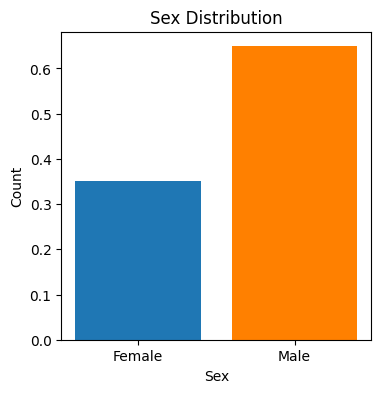

In [9]:
# Creates bar graph for attribute Sex
categories = ['Female', 'Male']
colors = ['tab:blue', '#FF8000']
sex_counts = data_with_errors['sex'].map({0: 'Female', 1: 'Male'}).value_counts(normalize=True).reindex(categories)
barplot(categories, sex_counts, 'Sex Distribution', 'Sex', 'Count', colors) 


Discussion:

After creating a bar graph for *Sex Distribution* we can determine that there are far more men than women in our dataset.

### Smoking Distribution

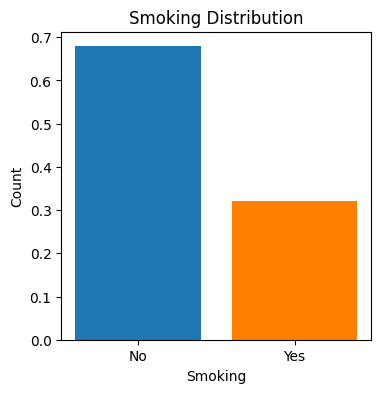

In [10]:
#Creates bar graph for attribute Smoking
categories = ['No', 'Yes']
colors = ['tab:blue', '#FF8000']
smoking_counts = data_with_errors['smoking'].map({0: 'No', 1: 'Yes'}).value_counts(normalize=True).reindex(categories)
barplot(categories, smoking_counts, 'Smoking Distribution', 'Smoking', 'Count', colors)

Discussion:

After creating the bar graph for *smoking* we can determine that far more people within our dataset did not regularly smoke.

### Diabetes

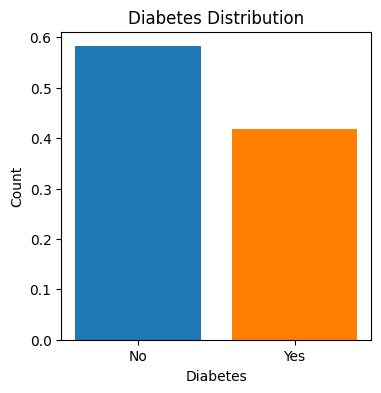

In [11]:
#Creates bar graph for attribute Diabetes
categories = ['No', 'Yes']
colors = ['tab:blue', '#FF8000']
diabetes_counts = data_with_errors['diabetes'].map({0: 'No', 1: 'Yes'}).value_counts(normalize=True).reindex(categories)
barplot(categories, diabetes_counts, 'Diabetes Distribution', 'Diabetes', 'Count', colors)

Discussion:

After creating the bar graph for *diabetes* we can determine that more people within our dataset did not have either diabetes 1 or 2, though the distribution between values is closer than the previous bar graphs.

### High Blood Pressure Distribution

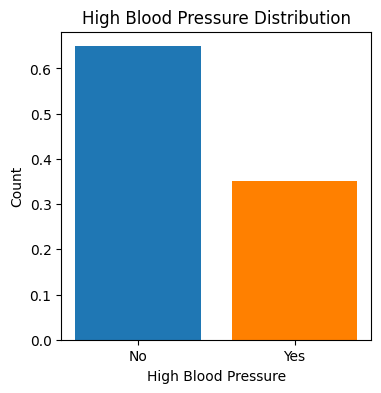

In [12]:
#Creates bar graph for attribute High Blood Pressure
categories = ['No', 'Yes']
colors = ['tab:blue', '#FF8000']
high_blood_pressure_counts = data_with_errors['high_blood_pressure'].map({0: 'No', 1: 'Yes'}).value_counts(normalize=True).reindex(categories)
barplot(categories, high_blood_pressure_counts, 'High Blood Pressure Distribution', 'High Blood Pressure', 'Count', colors)

Discussion:

After creating the bar graph for *high blood pressure* we can determine that far more people within our dataset did not have high blood pressure during their cardiac episode.

### Anaemia

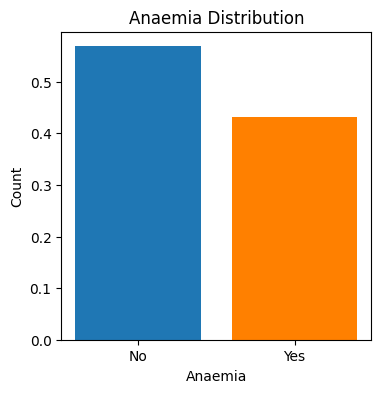

In [13]:
# Creates bar graph for attribute Anaemia
categories = ['No', 'Yes']
colors = ['tab:blue', '#FF8000']
anemia_counts = data_with_errors['anaemia'].map({0: 'No', 1: 'Yes'}).value_counts(normalize=True).reindex(categories)
barplot(categories, anemia_counts, 'Anaemia Distribution', 'Anaemia', 'Count', colors)

Discussion:

After creating the bar graph for *anaemia* we can determine that more people within our dataset did not have a deficiency of blood cells.

### Death Event Distribution

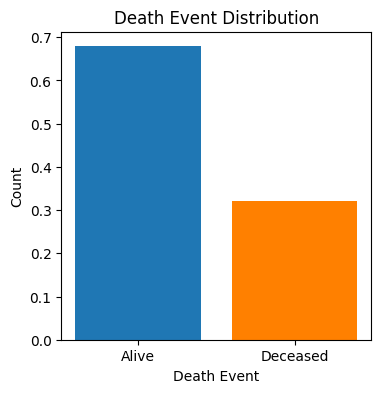

In [14]:
#Creates bar graph for attribute Death Event
categories = ['Alive', 'Deceased']
colors = ['tab:blue', '#FF8000']
death_event_counts = data_with_errors['death_event'].map({0: 'Alive', 1: 'Deceased'}).value_counts(normalize=True).reindex(categories)
barplot(categories, death_event_counts, 'Death Event Distribution', 'Death Event', 'Count', colors)

Discussion:

After creating the bar graph for *death event* we can determine that far more people within our dataset survived their cardiac episode.


***
# Section 2.4 - Verify data quality

We will consider various methods of cleaning the dataset:
- Removing potential outliers
- Determining what attributes would be better represented using a different format of data (i.e int -> bool)
- Removing attributes that will not consider when analyzing the data
***

## Outliers

We will be finding the values that are outliers for each numerical attribute: providing a range for good values, counting the number of outliers, and showing all of the values deemed outliers. 

In [15]:
def find_outliers(df_in, att_name):
    quantile_low  = 0.25
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)

    # Computes the high and low values of the range
    IQR = Q3-Q1
    good_range_low  = 0 if Q1 - (multiplier * IQR) < 0 else Q1 - (multiplier * IQR)
    good_range_high = Q3 + (multiplier * IQR) 
    
    # Gathers the outliers
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    if len(outlier_indices) > 0:
        outlier_value_list = []
        # Creates outlier list to be used for printing
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        # Prints outlier list with index
        print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))


        plt.figure(figsize=(10,1))
        sns.boxplot(x=att_name, data=df_in)
        plt.show()
    
    return outlier_indices



### Age

In [16]:
outliers = []
outlier_indices = {}
outlier_indices['age'] = find_outliers(data_with_errors, 'age')
outliers.extend(outlier_indices['age'])
print("No outliers found for age") if len(outlier_indices['age']) == 0 else None

No outliers found for age


### Creatinine Phosphokinase


Attribute: [ creatinine_phosphokinase ]   Good Range: [ 0 , 1280.25 ]   Number of Outliers: [ 29 ]
Index           Value
    1        7861.000
   60        7702.000
   72        5882.000
  103        5209.000
  134        4540.000
  171        3966.000
   52        3964.000
  227        2794.000
  280        2695.000
   38        2656.000
  250        2522.000
  164        2442.000
  297        2413.000
  163        2334.000
  208        2281.000
  149        2261.000
  296        2060.000
  246        2017.000
  187        1896.000
  107        1876.000
  153        1846.000
  295        1820.000
  130        1808.000
  200        1767.000
  283        1688.000
  147        1610.000
  139        1548.000
  176        1419.000
   46        1380.000


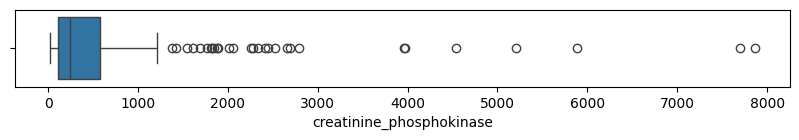

In [17]:

outlier_indices['creatinine_phosphokinase'] = find_outliers(data_with_errors, 'creatinine_phosphokinase')
outliers.extend(outlier_indices['creatinine_phosphokinase'])
print("No outliers found for creatinine phosphokinase") if len(outlier_indices['creatinine_phosphokinase']) == 0 else None

Discussion:

While the higher CPK levels are less common, they do indicate an increased chance of severe muscle injury; Thus, we should **not** remove the outliers.

### Ejection Fraction


Attribute: [ ejection_fraction ]   Good Range: [ 7.5 , 67.5 ]   Number of Outliers: [ 2 ]
Index           Value
   64          80.000
  217          70.000


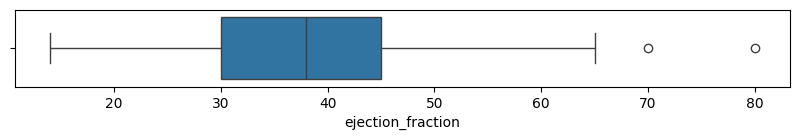

In [18]:
outlier_indices['ejection_fraction'] = find_outliers(data_with_errors, 'ejection_fraction')
outliers.extend(outlier_indices['ejection_fraction'])
print("No outliers found for ejection fraction") if len(outlier_indices['ejection_fraction']) == 0 else None

Discussion:

According to the <a href= "https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement">American Heart Association</a> we will perform the following actions the two outliers:
- (70%): This record fits within the normal range of EF, thus will **not** be removed.
- (80%): This record exceeds the range of EF, and the adnormal range is *below* the normal range. While it is possible to have a an EF of 80%, we **will** remove this record for the purposes of normalizing our data.

### Platelets


Attribute: [ platelets ]   Good Range: [ 76000.0 , 440000.0 ]   Number of Outliers: [ 21 ]
Index           Value
  109      850000.000
  296      742000.000
  105      621000.000
  287      543000.000
  240      533000.000
  117      507000.000
  224      504000.000
   69      497000.000
  212      481000.000
   55      461000.000
    7      454000.000
   47      451000.000
  279      451000.000
  162      448000.000
  163       75000.000
  200       73000.000
  167       70000.000
  230       62000.000
  281       51000.000
   15       47000.000
  277       25100.000


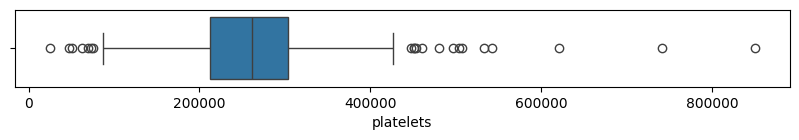

In [19]:
outlier_indices['platelets'] = find_outliers(data_with_errors, 'platelets')
outliers.extend(outlier_indices['platelets'])
print("No outliers found for platelets") if len(outlier_indices['platelets']) == 0 else None

Discussion:

According to <a href="https://www.jatit.org/volumes/hundredthree7.php">Journal of Theoretical and Applied Information Technology</a>, while the outliers below and above the normal range are vastly different, they are *all* considered possible as the range of possiblilities are between 25k-850k kiloplatelets/mL.

Thus, we shall not remove *any* of the records considered outliers.


### Serum Creatinine


Attribute: [ serum_creatinine ]   Good Range: [ 0.15000000000000024 , 2.1499999999999995 ]   Number of Outliers: [ 29 ]
Index           Value
    9           9.400
  217           9.000
   52           6.800
  131           6.100
   28           5.800
  228           5.000
   48           4.400
   10           4.000
  282           3.800
  124           3.700
   35           3.500
  203           3.500
  129           3.400
  117           3.200
   31           3.000
   39           3.000
   65           2.900
    4           2.700
   56           2.700
  281           2.700
   82           2.500
  150           2.500
  183           2.500
  167           2.400
  247           2.400
   38           2.300
   61           2.300
  104           2.300
   54           2.200


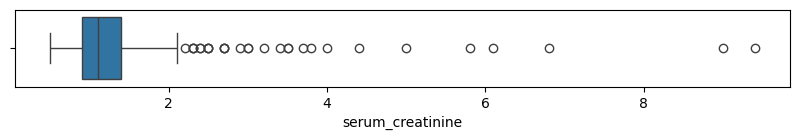

In [20]:
outlier_indices['serum_creatinine'] = find_outliers(data_with_errors, 'serum_creatinine')
outliers.extend(outlier_indices['serum_creatinine'])
print("No outliers found for serum creatinine") if len(outlier_indices['serum_creatinine']) == 0 else None

Discussion:

According to <a href="https://www.mountelizabeth.com.sg/tests-treatments/creatinine-level-clearance-test">Mount Elizabeth</a>, while the normal ranges are: 
- Adult male: 0.6-1.2 mg
- Adult female: 0.5-1.1 mg
- Adult with one kidney: 1.2-1.9 mg

Records >5.0 mg indicate increased chances of kidney problems that *can* link to their heart failure. Thus, we will not remove **any** records considered outliers. 


### Serum Sodium


Attribute: [ serum_sodium ]   Good Range: [ 125.0 , 149.0 ]   Number of Outliers: [ 5 ]
Index           Value
  225         125.000
  126         124.000
   19         121.000
    4         116.000
  199         113.000


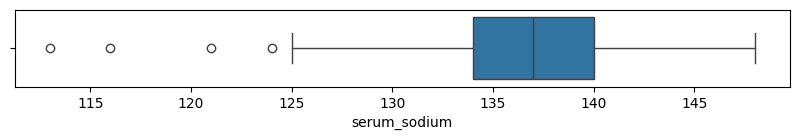

In [21]:
outlier_indices['serum_sodium'] = find_outliers(data_with_errors, 'serum_sodium')
outliers.extend(outlier_indices['serum_sodium'])
print("No outliers found for serum sodium") if len(outlier_indices['serum_sodium']) == 0 else None

Discussion:

According to <a href = "https://emedicine.medscape.com/article/242166-overview">Medscape</a>, the ranges of Hyponatremia diagnosis are:
- Mild: 130-134 mmol/L
- Moderate: 125-129 mmol/L
- Profound or severe: < 125 mmol/L

Meaning that the outliers detected suggest severe and moderate Hyponatremia. Thus we should **keep** these records as a means to find potential correlations between Hyponatremia and heart failure.


### Time

In [22]:
outlier_indices['time'] = find_outliers(data_with_errors, 'time')
outliers.extend(outlier_indices['time'])
print("No outliers found for time") if len(outlier_indices['time']) == 0 else None

No outliers found for time


### Remove records

After analyzing the outliers for each numerical attribute, we found one record to remove:

In [81]:
display(data_with_errors[data_with_errors['ejection_fraction'] == 80])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0


In [91]:
data_clean = data_with_errors.drop(data_with_errors[data_with_errors['ejection_fraction'] == 80].index)
print("Record removed") if int((data_clean['ejection_fraction'] > 80).sum()) == 0 else None

Record removed


***
## **Section 3 - Determine appropriate methods of finding correlation**
Methods of correlation to evaluate:
- Numerical vs Numerical
    - Pearson Correlation
    - Spearman Correlation
- Categorial vs Categorial
    - Cramer's V
- Categorial vs Numerical
    - Correlation Ratio
***

## Chi-Squared Test

Here we will be finding and evaluting the dependency of all categorial attributes pairs based on P-values being < 0.05.

- Our H0 Hypothesis: There is no relationship between attributes
- H0 Hypothesis is *rejected* if any P-values > 0.05


In [29]:
def create_chi2_matrix(df):
    #See: https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f
    import os 
    from sklearn.feature_selection import chi2
    from scipy import stats
    import seaborn as sns

    column_names=df.columns # Assign column names to row indexs 
    chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)

    # Set counters to zero
    outercnt=0
    innercnt=0

    for icol in column_names: # outer loop
        for jcol in column_names: # inner loop
            # Convert to cross tab - for Chi-square test, we have to first convert variables into contigency table
            mycrosstab=pd.crosstab(df[icol],df[jcol])
            # Get p-value and other information
            stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
            # Rounding very small p-values to zero
            chisqmatrix.iloc[outercnt,innercnt]=round(p,10)
            # Expected frequencies should be at least 5 for the majority (80%) of the cells.
            # Check expected frequency of each group
            cntexpected=expected[expected<5].size
            # Getting percentage 
            perexpected=((expected.size-cntexpected)/expected.size)*100
            if perexpected<20:
                chisqmatrix.iloc[outercnt,innercnt]=2.00        # Assign 2 as a flag 
            if icol==jcol:
                chisqmatrix.iloc[outercnt,innercnt]=0.00
            innercnt=innercnt+1
        outercnt=outercnt+1
        innercnt=0
    return chisqmatrix

In [ ]:
# Use Chi-Squared test to check for relationships between all pairs of categorical variables.
# If a p-value in the table below is less than a chosen alpha (say 0.05), then the H0 hypothesis that
# there is NO relationship between the two variables is REJECTED.
chi2matrix = create_chi2_matrix(data_with_errors[categoric_attributes])
(chi2matrix < 0.05).replace({True: 1, False: 0})


C:\Users\benja\AppData\Local\Temp\ipykernel_12892\1349355439.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  (chi2matrix < 0.05).replace({True: 1, False: 0})


,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event
anaemia,1,0,0,0,0,0
diabetes,0,1,0,1,1,0
high_blood_pressure,0,0,1,0,0,0
sex,0,1,0,1,1,0
smoking,0,1,0,1,1,0
death_event,0,0,0,0,0,1


After performing the Chi-Squared test to determine relationship between categorial attributes, we have discovered the following associations:
- Sex and Smoking
- Diabetes and Sex
- Diabetes and Smoking

It is important to note that we were unable to find any relationship involving death from heart failure using this method.